### Minor project: Using Supervised Machine Learning Algorithms for Autism Spectrum Disorder recognition

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving new_excel.xlsx to new_excel.xlsx


In [ ]:
df = pd.read_csv('new_excel.csv')
print(df.head())


   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

   contry_of_res used_app_before result     age_desc relation Class/

In [ ]:
df.shape


(704, 21)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [ ]:
df['ethnicity'].value_counts()


White-European     233
Asian              123
?                   95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [ ]:
df['relation'].value_counts()


Self                        522
?                            95
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [ ]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


### Visualisations


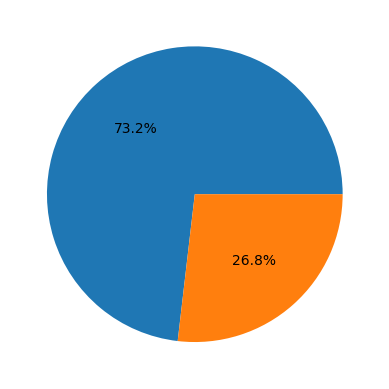

In [ ]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
# 73.2% - NO
plt.show()

In [ ]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

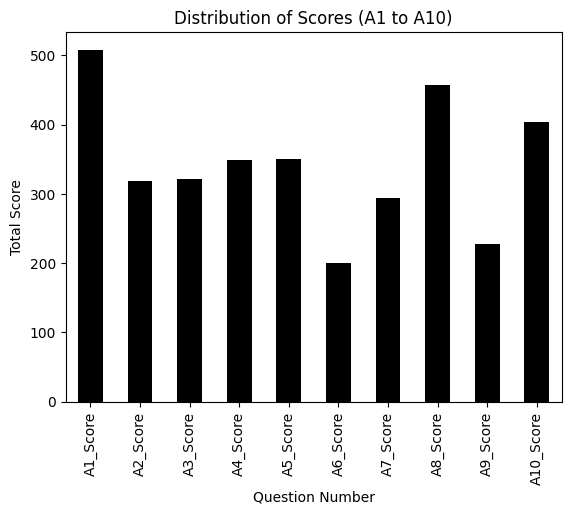

In [ ]:
scores_df = df.loc[:, 'A1_Score':'A10_Score']
scores_df.sum().plot(kind='bar', color='black')
plt.title('Distribution of Scores (A1 to A10)')
plt.xlabel('Question Number')
plt.ylabel('Total Score')
plt.show()
#results for No of one

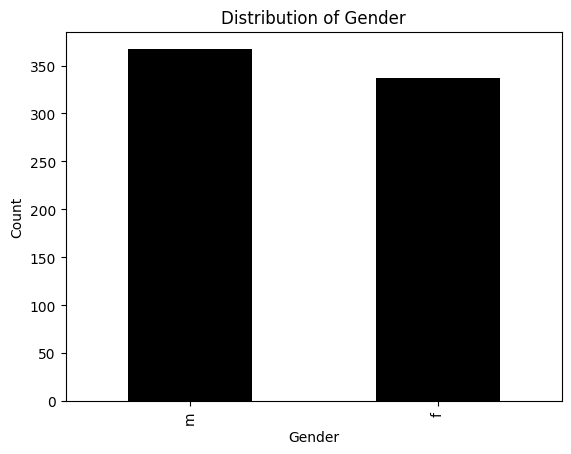

In [ ]:


df['gender'].value_counts().plot(kind='bar', color='black')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

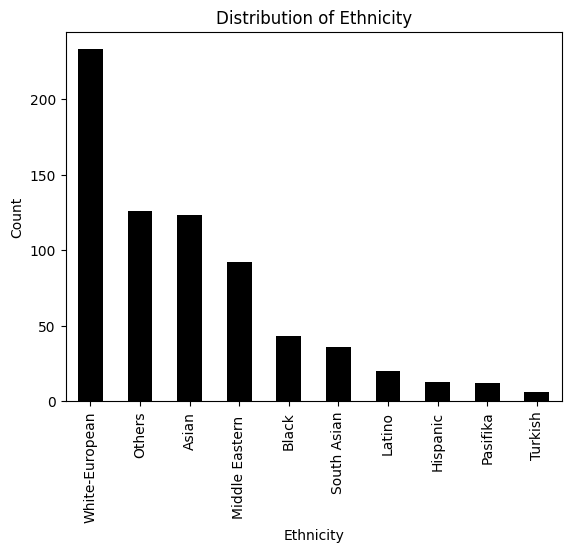

In [ ]:
#ethnicity graph
df['ethnicity'].value_counts().plot(kind='bar', color='black')
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

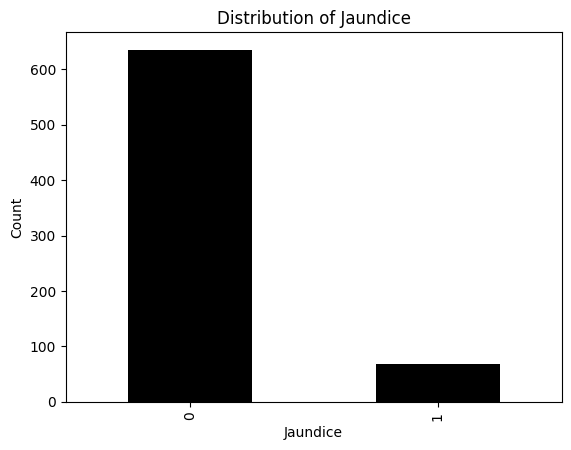

In [ ]:
# jaundice at birth

df['jundice'].value_counts().plot(kind='bar', color='black')
plt.title('Distribution of Jaundice')
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.show()

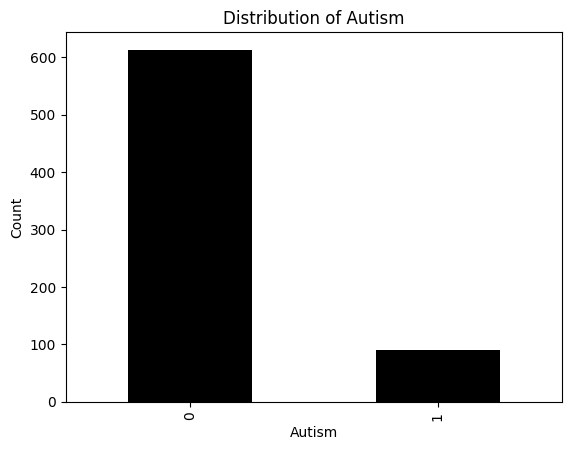

In [ ]:
# autism result
df['austim'].value_counts().plot(kind='bar', color='black')
plt.title('Distribution of Autism')
plt.xlabel('Autism')
plt.ylabel('Count')
plt.show()

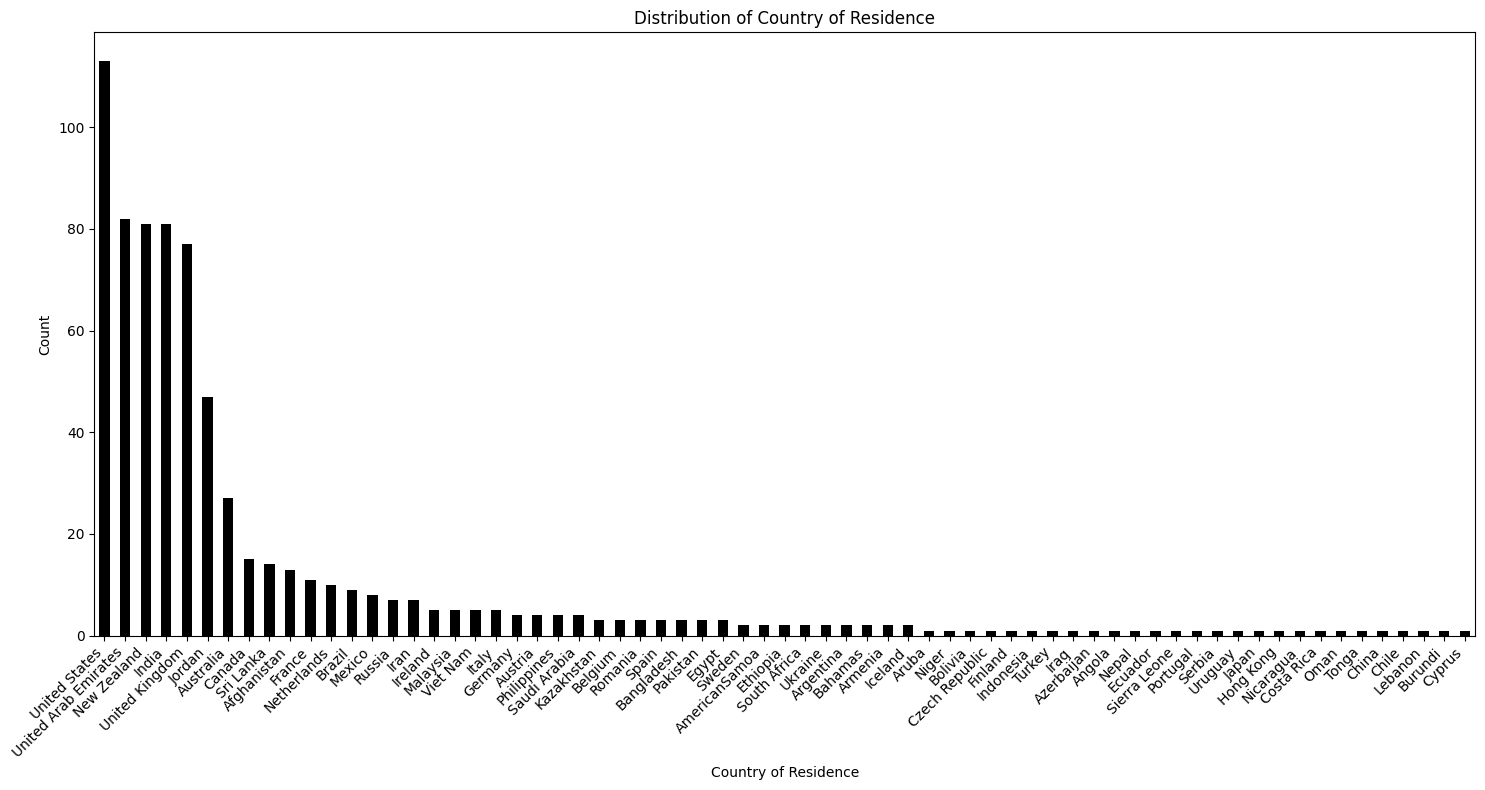

In [ ]:

plt.figure(figsize=(15, 8))
df['contry_of_res'].value_counts().plot(kind='bar', color='black')
plt.title('Distribution of Country of Residence')
plt.xlabel('Country of Residence')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

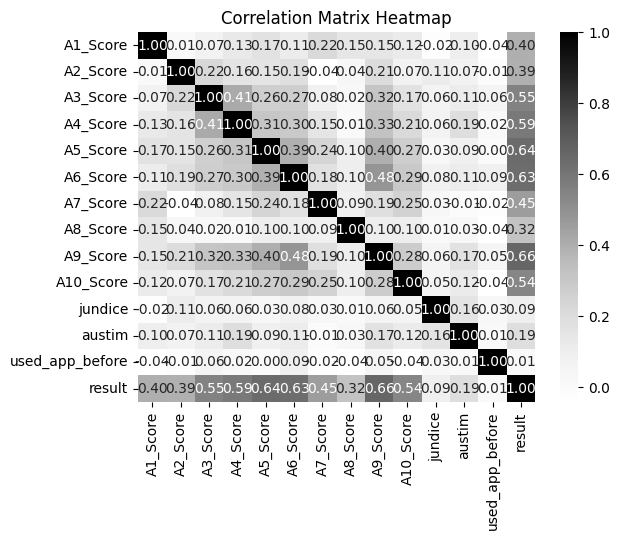

In [ ]:

numeric_columns = df.select_dtypes(include=['int64']).columns
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, cmap='Greys', annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
#count plot for class/ASD

In [ ]:
df = df[df['result']>-5]
df.shape

(704, 21)

In [ ]:

def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

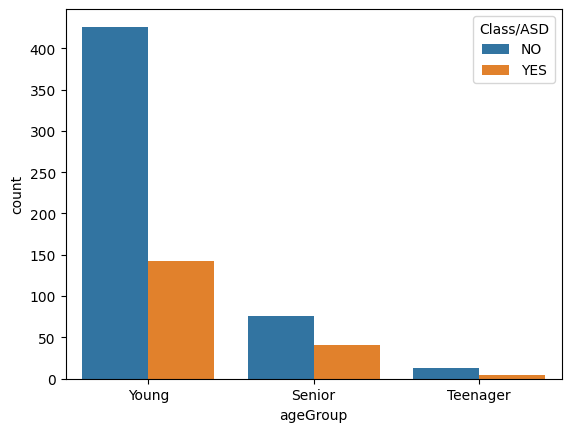

In [ ]:
sns.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [ ]:
def add_feature(data):

  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    data['sum_score'] += data[col]

  data['ind'] = data['austim'] + data['used_app_before'] + data['jundice']

  return data

df = add_feature(df)

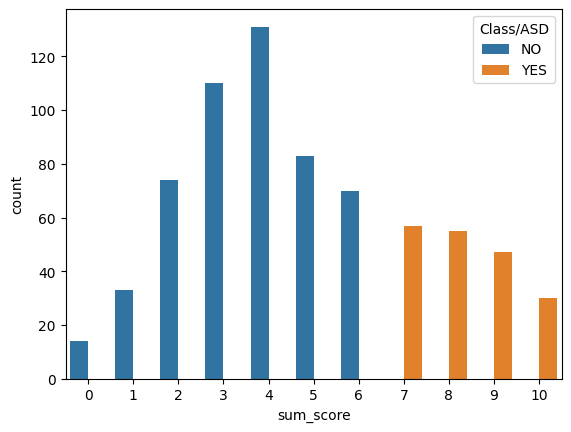

In [ ]:
sns.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [ ]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))

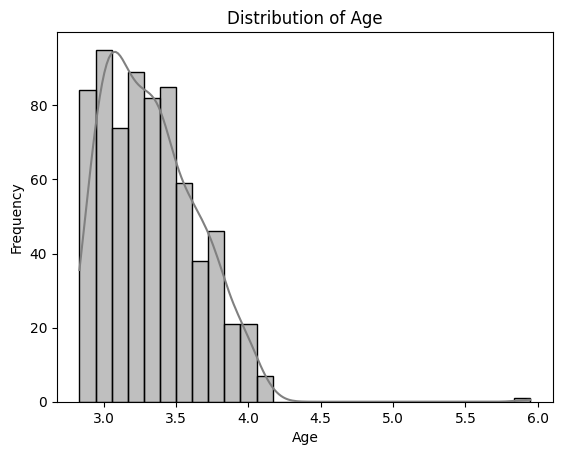

In [ ]:

sns.histplot(df['age'], color='gray', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Applying the ML models


In [ ]:
removal = ['age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [ ]:

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10, stratify=target)


oversampler = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)


print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of Y_train_resampled:", Y_train_resampled.shape)

Shape of X_train_resampled: (824, 20)
Shape of Y_train_resampled: (824,)


In [ ]:

scaler = StandardScaler()
X = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

In [ ]:

nan_columns = np.isnan(X).any(axis=0)
nan_columns = np.where(nan_columns)[0].tolist()

print("Columns with NaN values:", nan_columns)

Columns with NaN values: [10]


In [ ]:
column_means = np.nanmean(X, axis=0)

X = np.where(np.isnan(X), column_means, X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_val_scaled = scaler.transform(X_val)

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in range(len(models)):
    models[model].fit(X_scaled, Y_train_resampled)
    accm=metrics.roc_auc_score(Y_train_resampled, models[model].predict(X_scaled))
    valm=metrics.roc_auc_score(Y_val, models[model].predict(X_val_scaled))
    print(f'{models[model]} : ')
    print('Training AUC-ROC Score : ', acc[model])
    print('Validation AUC-ROC Score : ', val[model])
    print()

LogisticRegression() : 
Training AUC-ROC Score :  0.924
Validation AUC-ROC Score :  0.91

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training AUC-ROC Score :  0.901
Validation AUC-ROC Score :  0.89

SVC() : 
Training AUC-ROC Score :  0.883
Validation AUC-ROC Score :  0.86



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics


X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10, stratify=Y)


# List of models
models = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel='rbf'),
    MLPClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier()
]

# Training and evaluation loop
for model in models:
    model.fit(X_train_scaled, Y_train)

    print(f'{model} : ')
    print('Training AUC-ROC Score : ', metrics.roc_auc_score(Y_train, model.predict(X_train_scaled)))
    print('Validation AUC-ROC Score : ', metrics.roc_auc_score(Y_val, model.predict(X_val_scaled)))
    print()


LogisticRegression() : 
Training AUC-ROC Score :  0.9245491
Validation AUC-ROC Score :  0.91426

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training AUC-ROC Score :  0.9019123
Validation AUC-ROC Score :  0.89634

SVC() : 
Training AUC-ROC Score :  0.8836082
Validation AUC-ROC Score